<!-- jupyter: {tags: ["title", "metadata"]} -->

<style>
@import url("../assets/templates/journal/styles.css");
</style>

<div class="title-page">
    <h1>Analysis of Aerators for Shrimp Farming: Cost Optimization and the Real Cost of "Cheap"</h1>
    <div class="author-info">
        <p>Luis Paulo Vinatea Barberena</p>  
        <p class="affiliation">BarberNode</p>  
        <p>luisvinatea@icloud.com, +55 48 99221-9675</p>  
        <p>Servidao das Caranhas, 22, Barra da Lagoa, Florianopolis, SC, Brazil, 88061635</p>  
        <p>2025-05-02</p>  
    </div>
</div>

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from IPython.display import HTML

<!-- jupyter: {tags: ["abstract"]} -->

<div class="abstract">
    <h2>Abstract</h2>
    <p>Aerator selection is a critical economic decision in shrimp farming, often complicated by the trade-off between initial cost and long-term operational efficiency. This paper presents an analysis comparing two aerator options within the context of a specific shrimp farm, integrating Léon Walras's General Equilibrium Theory and Friedrich von Wieser's concept of Opportunity Cost. The study evaluates aerators based on updated technical performance metrics (including Temperature-Adjusted Oxygen Transfer Rate - OTRT and Standard Aeration Efficiency - SAE) derived from the farm's Total Oxygen Demand (TOD) and detailed, adapted financial indicators (Net Present Value - NPV, Internal Rate of Return - IRR, Payback Period, Return on Investment - ROI, Profitability Index - k, Opportunity Cost, and Equilibrium Price) tailored for equipment comparison. Results from the specific case study demonstrate that prioritizing higher efficiency (Aerator 2) over lower initial unitary cost (Aerator 1) leads to substantial long-term savings, a significantly positive NPV, high interpreted ROI and IRR, rapid payback, and a considerable opportunity cost associated with choosing the less efficient option. The analysis underscores the importance of applying robust economic principles and adapted technical-financial assessments for optimizing operational costs and ensuring financial sustainability in shrimp aquaculture (Boyd & Hanson, 2021; The Fish Site, 2021).</p>

<div class="keywords">
        <span class="keywords-title">Keywords:</span> Shrimp Farming, Aquaculture Economics, Aerator Efficiency, Opportunity Cost, Cost Optimization, Mathematical Modeling, Financial Analysis, Equipment Comparison Metrics
    </div>
</div>



<!-- jupyter: {tags: ["highlights"]} -->

<div class="highlights">
    <h2>Highlights</h2>
    <ul>
        <li>Higher efficiency aerators reduce long-term costs in shrimp farming.</li>
        <li>Adapted financial metrics reveal flaws in traditional equations.</li>
        <li>Opportunity cost of low-efficiency aerators exceeds $14M in NPV.</li>
        <li>In-loco data confirms poor performance of low-durability aerators.</li>
    </ul>
</div>

<!-- jupyter: {tags: ["section", "introduction"]} -->
<div class="introduction">
<h2>1. Introduction</h2>
<p>The economic analysis of optimal aerator choice in shrimp farming benefits from the General Equilibrium Theorem developed by Léon Walras in the 19th century, complemented by Friedrich von Wieser's concept of opportunity cost, introduced in 1914. Walras proposed a framework to understand how interconnected markets reach simultaneous equilibrium, where supply equals demand through relative prices (Walras, 1874). This approach is useful for analyzing complex systems like shrimp farms, where multiple "markets" (oxygen, energy, shrimp, operating costs) interact to maximize profitability (Asche et al., 2021). Opportunity cost measures the value of the best alternative forgone, evaluating aerator options (Boyd & Hanson, 2021).</p>
</div>

<!-- jupyter: {tags: ["subsection", "introduction"]} -->

<h3>1.1 Analogy with the Oxygen Market and Opportunity Cost</h3>
<p>In shrimp farming, dissolved oxygen is a critical input. An "internal oxygen market" can be conceptualized where demand (Total Oxygen Demand, TOD) is driven by shrimp and microbial needs, and supply depends on aerators' Temperature-Adjusted Oxygen Transfer Rate (OTRT). Aerators interact with energy, maintenance, and replacement markets, connecting to the external shrimp market. Walras's Theorem suggests equilibrium when these markets adjust simultaneously. Choosing a cheaper, less efficient aerator incurs an opportunity cost equal to the net present value of savings forgone by not selecting the more efficient option (Boyd & Hanson, 2021; Susilowati et al., 2021).</p>

<!-- jupyter: {tags: ["subsection", "introduction"]} -->

<h3>1.2 The Cake Recipe: Why Assuming HP per Pound of Shrimp is Incorrect</h3>
<p>Assuming a fixed horsepower (HP)-per-production ratio is erroneous. Shrimp production depends on multiple factors (dissolved oxygen, temperature, salinity, density). Aerator HP does not directly equate to oxygen supply; OTR_T is critical. Fixed HP ratios ignore interdependencies, leading to inefficient investments in low-OTR_T aerators and significant opportunity costs (Boyd, 2015; Responsible Seafood Advocate, 2022).</p>

<!-- jupyter: {tags: ["subsection", "introduction"]} -->

<h3>1.3 Original Equation of Léon Walras's General Equilibrium</h3>
<p>Walras formalized general equilibrium with supply/demand equations, subject to Walras's Law (excess demands sum to zero). Equilibrium prices are found via "tâtonnement" (Walras, 1874). In shrimp farming, equilibrium involves optimizing aerator costs, meeting TOD, maximizing profits, and accounting for opportunity cost (Asche et al., 2021; Valderrama et al., 2023).</p>

<!-- jupyter: {tags: ["subsection", "methods", "mathematical-models"]} -->

<div class="subsection">
<h3>2.3 Mathematical Models for Aerator Comparison</h3>

<h4>2.3.1 Oxygen Transfer Rate Calculations</h4>

<h5>2.3.1.1 Standard Oxygen Transfer Rate (SOTR)</h5>
<p>The baseline oxygen transfer capacity under standard conditions (20°C, 0 DO, 1 atm), measured in kg O₂/hr (Kumar et al., 2020).</p>
</div>

<div class="equation-block">
<h5>2.3.1.2 Temperature-Adjusted Oxygen Transfer Rate (OTRT)</h5>

$$
OTR_T = (\text{SOTR} \times 0.5) \times \theta^{(T-20)}
$$

Where $\theta = 1.024$ (temperature correction factor) (Boyd, 2015).
</div>

<div class="equation-block">
<h5>2.3.1.3 Standard Aeration Efficiency (SAE)</h5>

$$
\text{SAE} = \frac{\text{SOTR}}{\text{Power (kW)}} \quad ( kg \ O_2 / \text{kWh})
$$

Where $\text{Power (kW)} = \text{Power (HP)} \times 0.746$ (Kumar et al., 2020).
</div>

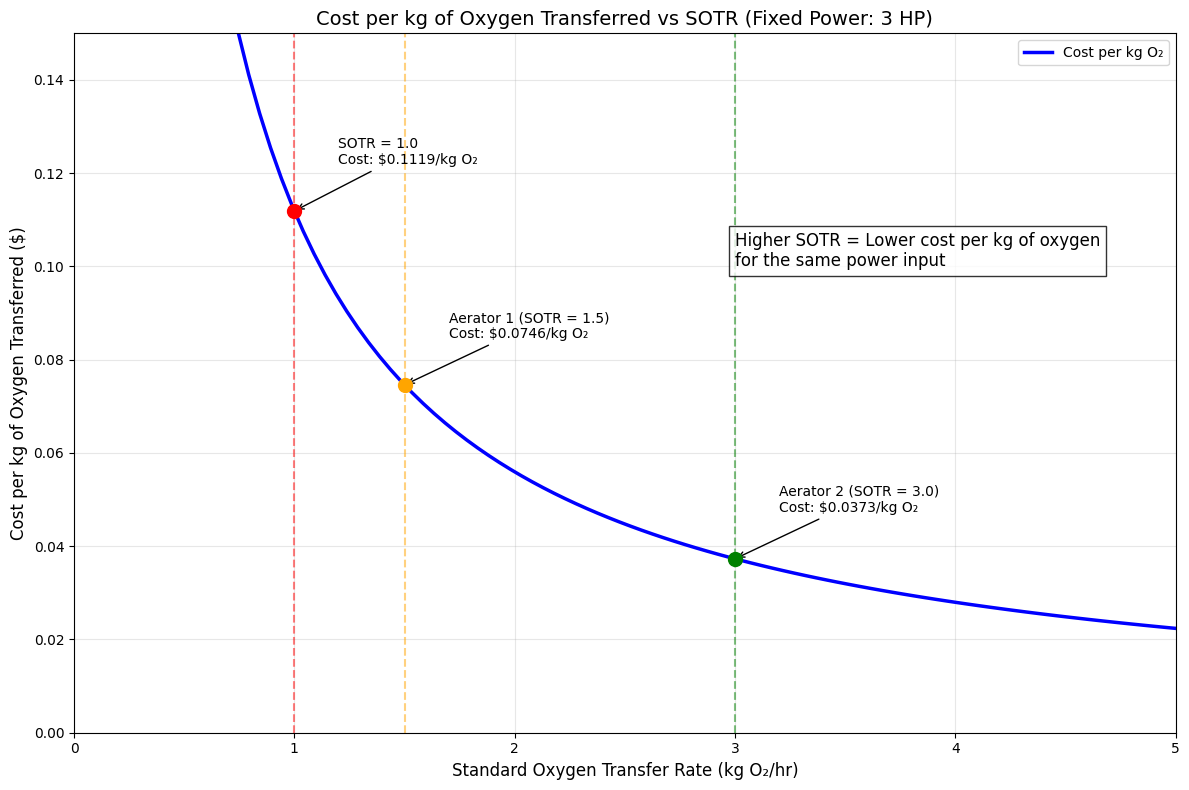

Aerator,SOTR(kg O₂/hr),Daily Oxygen(kg O₂/day),Cost Efficiency($/kg O₂),RelativeInefficiency,To MatchBest Output,Daily Costto Match
SOTR = 1.0,1.0,8.0,$0.1119,3.00× more expensive,3.00 units,$2.69
Aerator 1 (SOTR = 1.5),1.5,12.0,$0.0746,2.00× more expensive,2.00 units,$1.79
Aerator 2 (SOTR = 3.0),3.0,24.0,$0.0373,Reference (✓),1.00 units,$0.90


In [3]:
# Fixed power input for all calculations (3 HP converted to kW)
fixed_power_kw = 2.238  # 3 HP * 0.746 kW/HP

# Constants
price_per_kWh = 0.05  # Price of kWh in currency units
hours_operation_per_day = 8  # Hours of operation per day

# Create an array of SOTR values from 0.1 to 5 kg O₂/hr
# (avoiding division by zero by starting at 0.1)
SOTR_range = np.linspace(0.1, 5, 100)

# Calculate cost per kg of oxygen transferred
# Formula: (Power in kW * price_per_kWh) / SOTR = cost per kg O₂
hourly_power_cost = (
    fixed_power_kw * price_per_kWh
)  # Cost per hour for electricity
cost_per_kg_oxygen = (
    hourly_power_cost / SOTR_range
)  # Cost per kg of oxygen transferred

# Plotting the inverse relationship
plt.figure(figsize=(12, 8))
plt.plot(
    SOTR_range,
    cost_per_kg_oxygen,
    label="Cost per kg O₂",
    color="blue",
    linewidth=2.5,
)

# Add reference points for specific SOTR values
reference_SOTR_values = [
    1.0,
    1.5,
    3.0,
]  # Example values (including those from the case study)
reference_colors = ["red", "orange", "green"]
reference_labels = [
    "SOTR = 1.0",
    "Aerator 1 (SOTR = 1.5)",
    "Aerator 2 (SOTR = 3.0)",
]

for i, sotr in enumerate(reference_SOTR_values):
    cost = hourly_power_cost / sotr
    plt.scatter(sotr, cost, color=reference_colors[i], s=100, zorder=5)
    plt.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.5)
    plt.annotate(
        f"{reference_labels[i]}\nCost: ${cost:.4f}/kg O₂",
        xy=(sotr, cost),
        xytext=(sotr + 0.2, cost + 0.01),
        arrowprops=dict(arrowstyle="->"),
    )

plt.title(
    "Cost per kg of Oxygen Transferred vs SOTR (Fixed Power: 3 HP)",
    fontsize=14,
)
plt.xlabel("Standard Oxygen Transfer Rate (kg O₂/hr)", fontsize=12)
plt.ylabel("Cost per kg of Oxygen Transferred ($)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 0.15)  # Adjust based on your calculated values

# Add annotation explaining the relationship
plt.text(
    3.0,
    0.10,
    "Higher SOTR = Lower cost per kg of oxygen\nfor the same power input",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.8),
)

plt.legend()
plt.tight_layout()
plt.show()

# Collect data for HTML table
aerator_data = []
for i, sotr in enumerate(reference_SOTR_values):
    # Cost per kg of oxygen
    cost_per_kg = hourly_power_cost / sotr
    # Total oxygen transferred per day
    daily_oxygen = sotr * hours_operation_per_day

    data = {
        "name": reference_labels[i],
        "sotr": sotr,
        "daily_oxygen": daily_oxygen,
        "cost_per_kg": cost_per_kg,
    }

    # Add comparison metrics for non-top performers
    if sotr != max(reference_SOTR_values):
        efficiency_ratio = max(reference_SOTR_values) / sotr
        oxygen_difference = (
            max(reference_SOTR_values) * hours_operation_per_day - daily_oxygen
        )
        additional_aerators = oxygen_difference / daily_oxygen
        total_aerators = 1 + additional_aerators

        data.update(
            {
                "efficiency_ratio": efficiency_ratio,
                "oxygen_difference": oxygen_difference,
                "additional_aerators": additional_aerators,
                "total_aerators": total_aerators,
                "match_cost": total_aerators
                * hourly_power_cost
                * hours_operation_per_day,
            }
        )
    else:
        # For the best aerator, set comparison values to show it's the reference
        data.update(
            {
                "efficiency_ratio": 1.0,
                "oxygen_difference": 0.0,
                "additional_aerators": 0.0,
                "total_aerators": 1.0,
                "match_cost": hourly_power_cost * hours_operation_per_day,
            }
        )

    aerator_data.append(data)

# Generate HTML table
html = f"""
<div style="margin: 20px 0;">
<h3>Daily Operating Cost and Oxygen Transfer (8-hour operation, one 3HP aerator)</h3>
<p>Daily power cost: ${hourly_power_cost * hours_operation_per_day:.2f}/day (same for all aerators with same power)</p>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; text-align: left; border: 1px solid #ddd; color: #000000">Aerator</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">SOTR<br>(kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Daily Oxygen<br>(kg O₂/day)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Cost Efficiency<br>($/kg O₂)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Relative<br>Inefficiency</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">To Match<br>Best Output</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Daily Cost<br>to Match</th>
        </tr>
    </thead>
    <tbody>
"""

# Add rows for each aerator
for i, data in enumerate(aerator_data):
    # Use color coding based on efficiency (green for best, yellow for middle, red for worst)
    if data["sotr"] == max(reference_SOTR_values):
        row_color = "#0fe221"  # Light green for the best performer
    elif data["sotr"] == min(reference_SOTR_values):
        row_color = "#c02239"  # Light red for worst performer
    else:
        row_color = "#c7a020"  # Light yellow for middle performer

    html += f"""
        <tr style="background-color: {row_color};">
            <td style="padding: 8px; border: 1px solid #ddd;">{data["name"]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["sotr"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["daily_oxygen"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${data["cost_per_kg"]:.4f}</td>
    """

    # For the best performer, add a checkmark and special formatting
    if data["sotr"] == max(reference_SOTR_values):
        html += f"""
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">Reference (✓)</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">1.00 units</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${data["match_cost"]:.2f}</td>
        </tr>
        """
    else:
        html += f"""
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["efficiency_ratio"]:.2f}× more expensive</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["total_aerators"]:.2f} units</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${data["match_cost"]:.2f}</td>
        </tr>
        """

# Close the table
html += """
    </tbody>
</table>

<div style="margin-top: 10px; padding: 20px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>Insights:</strong></p>
    <ul>
        <li>Higher SOTR means more oxygen transferred for the same power input</li>
        <li>Lower cost per kg O₂ means better operational efficiency</li>
        <li>To match the output of the best aerator, less efficient models require multiple units, increasing total cost</li>
    </ul>
</div>
</div>
"""

# Display the HTML
display(HTML(html))

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

<div class="equation-block">
<h5>2.3.1.4 Aerator Quantity Calculation</h5>

$$
\text{Number of Aerators} = \left\lceil \frac{TOD}{OTR_T} \right\rceil
$$

</div>

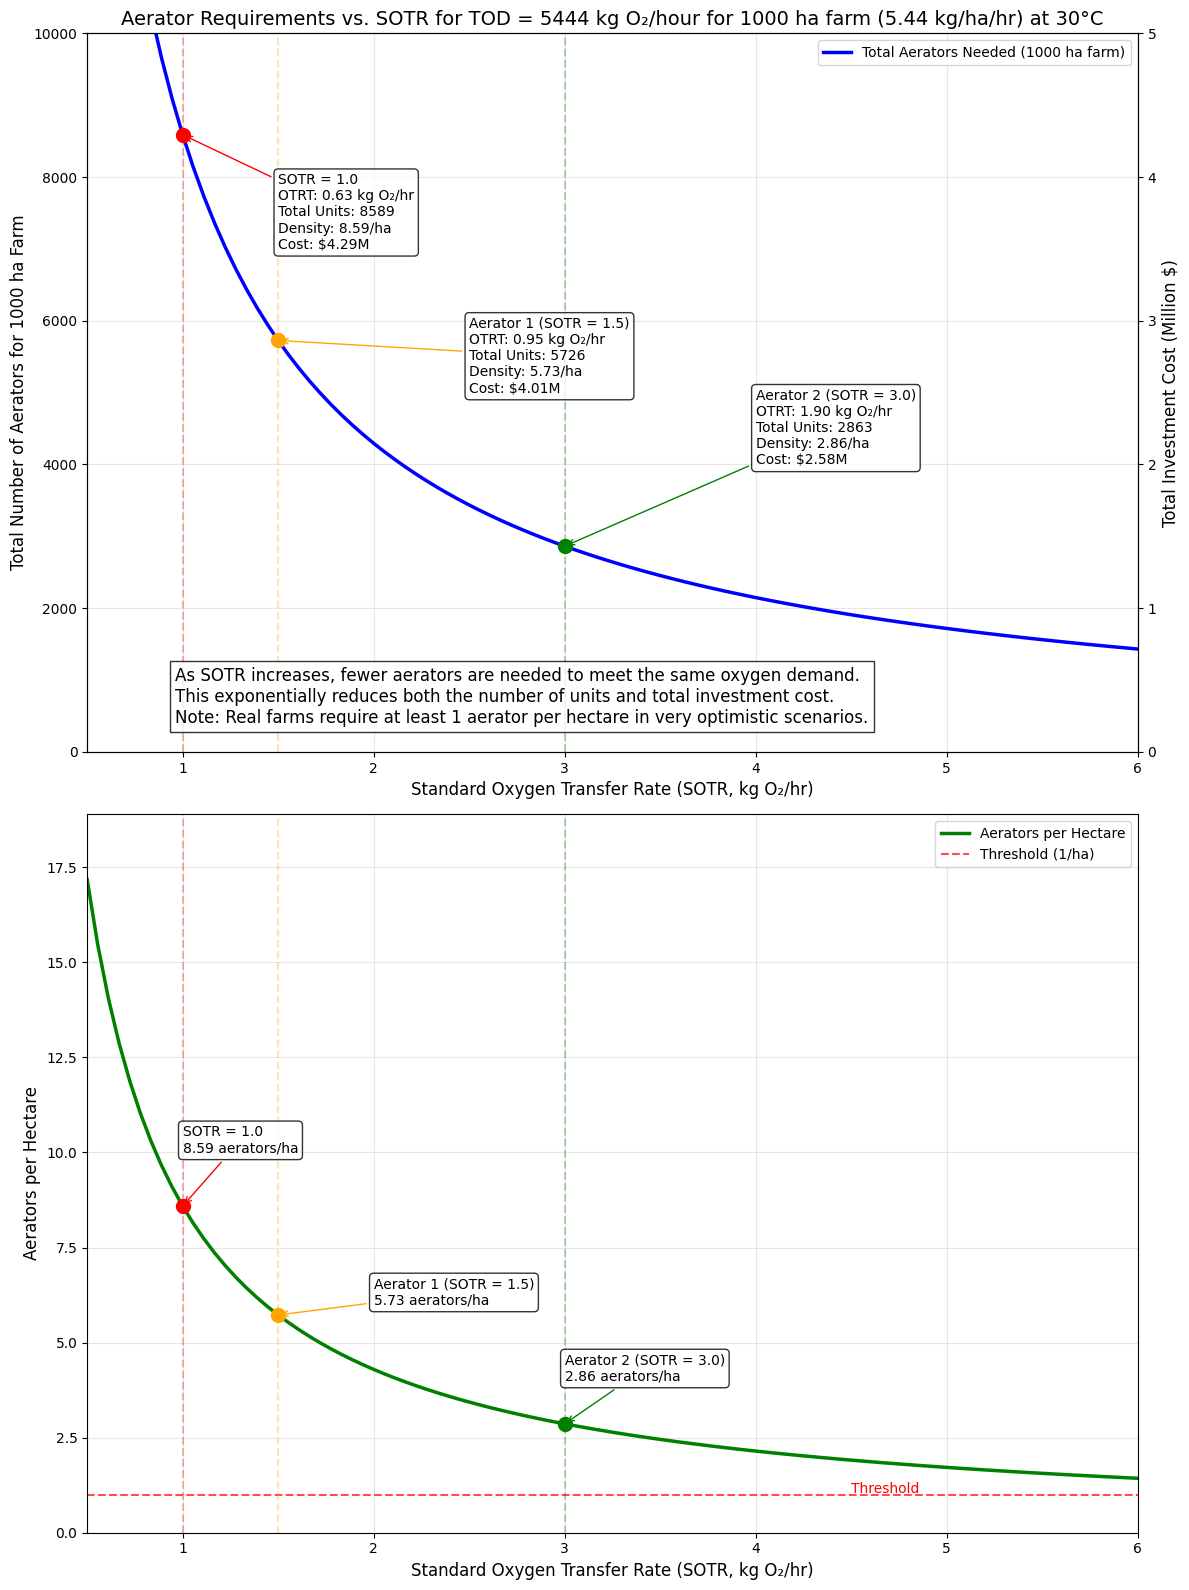

SOTR (kg O₂/hr),OTRT (kg O₂/hr),Units Required(1000 ha farm),Aerators perHectare,Total Cost ($M),Savings vs. 1.0 ($M)
1.0,0.63,8589,8.59,$4.29M,$0.00M
1.5,0.95,5726,5.73,$4.01M,$0.29M
3.0,1.90,2863,2.86,$2.58M,$1.72M


In [5]:
# Plot the relationship between SOTR and number of aerators needed based on TOD

# Constants
TOD = 5443.76  # Total Oxygen Demand (kg O₂/hour) for entire 1000 ha farm
farm_size_ha = 1000  # Total farm size in hectares
tod_per_ha = (
    TOD / farm_size_ha
)  # Oxygen demand per hectare (about 5.44 kg O₂/hour/ha)
temp = 30  # Water temperature in °C
temp_diff = temp - 20  # Difference from standard conditions (20°C)
hours_operation = (
    24  # Hours of operation per day (assuming 24h since TOD is continuous)
)

# Create a range of SOTR values
SOTR_range = np.linspace(0.5, 6, 100)  # From 0.5 to 6 kg O₂/hr

# Calculate OTRT for each SOTR value
# OTRT = SOTR × 0.5 × 1.024^(temp_diff)
OTRT_range = SOTR_range * 0.5 * (1.024**temp_diff)

# Calculate aerators needed for each OTRT
# Number of Aerators = TOD / OTRT (hourly oxygen demand / hourly oxygen transfer)
# This gives us the total number of aerators needed for the entire farm
aerators_needed = TOD / OTRT_range

# Calculate aerators per hectare
aerators_per_ha = aerators_needed / farm_size_ha

# Calculate cost for each aerator type (assuming our reference models)
reference_costs = {
    1.0: 500,  # Generic low SOTR aerator price
    1.5: 700,  # Aerator 1's price
    3.0: 900,  # Aerator 2's price
}

# Setup figure with multiple subplots
fig, (ax1, ax3) = plt.subplots(
    2, 1, figsize=(12, 16), gridspec_kw={"height_ratios": [1, 1]}
)
ax2 = ax1.twinx()  # Secondary y-axis for the top plot for cost

# Plot the main curve (total aerators needed for farm)
curve = ax1.plot(
    SOTR_range,
    aerators_needed,
    "b-",
    linewidth=2.5,
    label="Total Aerators Needed (1000 ha farm)",
)

# Plot the second curve (aerators per hectare) in the bottom plot
ax3.plot(
    SOTR_range,
    aerators_per_ha,
    "g-",
    linewidth=2.5,
    label="Aerators per Hectare",
)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel("Standard Oxygen Transfer Rate (SOTR, kg O₂/hr)", fontsize=12)
ax3.set_ylabel("Aerators per Hectare", fontsize=12)
ax3.set_xlim(0.5, 6)
ax3.set_ylim(0, max(aerators_per_ha) * 1.1)

# Mark minimum typical density (1 aerator per hectare)
ax3.axhline(
    y=1.0,
    linestyle="--",
    color="red",
    alpha=0.7,
    label="Threshold (1/ha)",
)
ax3.text(4.5, 1.05, "Threshold", fontsize=10, color="red")

# Plot the reference points for our specific aerators
reference_SOTR_values = [1.0, 1.5, 3.0]
reference_colors = ["red", "orange", "green"]
reference_labels = [
    "SOTR = 1.0",
    "Aerator 1 (SOTR = 1.5)",
    "Aerator 2 (SOTR = 3.0)",
]

# Manual annotation positions for better layout control
# Format: x-position, y-position
annotation_positions = [
    (1.5, 7000),  # Position for SOTR = 1.0 annotation
    (2.5, 5000),  # Position for SOTR = 1.5 annotation
    (4.0, 4000),  # Position for SOTR = 3.0 annotation
]

for i, sotr in enumerate(reference_SOTR_values):
    # Find the closest index in our range
    idx = np.abs(SOTR_range - sotr).argmin()

    # Calculate OTRT and number of aerators
    otrt = sotr * 0.5 * (1.024**temp_diff)
    num_aerators = TOD / otrt
    aerators_per_ha_value = num_aerators / farm_size_ha

    # Calculate total investment cost
    total_cost = num_aerators * reference_costs[sotr]

    # Plot the point on both graphs
    ax1.scatter(sotr, num_aerators, color=reference_colors[i], s=100, zorder=5)
    ax3.scatter(
        sotr, aerators_per_ha_value, color=reference_colors[i], s=100, zorder=5
    )

    # Add vertical reference line on both graphs
    ax1.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.3)
    ax3.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.3)

    # Add annotation with details - using manually specified positions
    ax1.annotate(
        f"{reference_labels[i]}\nOTRT: {otrt:.2f} kg O₂/hr\nTotal Units: {num_aerators:.0f}\nDensity: {aerators_per_ha_value:.2f}/ha\nCost: ${total_cost / 1000000:.2f}M",
        xy=(sotr, num_aerators),
        xytext=annotation_positions[i],  # Use predefined position
        arrowprops=dict(arrowstyle="->", color=reference_colors[i]),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

    # Manual annotation positions for bottom graph
    # Format: x, y for each reference point
    bottom_positions = [
        (1.0, 10.0),  # Position for SOTR = 1.0 annotation
        (2.0, 6.0),  # Position for SOTR = 1.5 annotation
        (3.0, 4.0),  # Position for SOTR = 3.0 annotation
    ]

    # Add annotation to bottom graph with manual positioning
    ax3.annotate(
        f"{reference_labels[i]}\n{aerators_per_ha_value:.2f} aerators/ha",
        xy=(sotr, aerators_per_ha_value),
        xytext=bottom_positions[i],  # Use predefined position
        arrowprops=dict(arrowstyle="->", color=reference_colors[i]),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

# Plot cost curves on secondary axis
# for i, sotr in enumerate(reference_SOTR_values):
#    # Calculate a range of costs based on this aerator's unit price
#    aerator_costs = (
#        aerators_needed * reference_costs[sotr] / 1000000
#    )  # Convert to millions
#    cost_curve = ax2.plot(
#        SOTR_range,
#        aerator_costs,
#        color=reference_colors[i],
#        linestyle="--",
#        alpha=0.6,
#        label=f"{reference_labels[i]} (${reference_costs[sotr]}/unit)",
#    )

# Set labels and title
ax1.set_xlabel("Standard Oxygen Transfer Rate (SOTR, kg O₂/hr)", fontsize=12)
ax1.set_ylabel("Total Number of Aerators for 1000 ha Farm", fontsize=12)
ax2.set_ylabel("Total Investment Cost (Million $)", fontsize=12)

ax1.set_title(
    f"Aerator Requirements vs. SOTR for TOD = {TOD:.0f} kg O₂/hour for 1000 ha farm (5.44 kg/ha/hr) at {temp}°C",
    fontsize=14,
)

# Adjust y-axes limits for better visualization
ax1.set_ylim(0, min(10000, max(aerators_needed) * 1.1))
ax2.set_ylim(0, 5)  # Adjust based on your cost range

# Add grid and legend
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.5, 6)

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)
ax3.legend(loc="upper right", fontsize=10)

# Add explanatory annotation
plt.figtext(
    0.15,
    0.58,
    "As SOTR increases, fewer aerators are needed to meet the same oxygen demand.\n"
    "This exponentially reduces both the number of units and total investment cost.\n"
    "Note: Real farms require at least 1 aerator per hectare in very optimistic scenarios.",
    bbox=dict(facecolor="white", alpha=0.8),
    fontsize=12,
    ha="left",
    va="top",
)

plt.tight_layout()
plt.show()

# Update the HTML table with the corrected calculations and per-hectare information
html_table = """
<div style="margin: 20px 0;">
<h3>Aerator Requirements Comparison Table</h3>
<p>For TOD = {:.0f} kg O₂/hour (1000 ha farm, {:.2f} kg/ha/hr) at {}°C</p>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">SOTR (kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">OTRT (kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Units Required<br>(1000 ha farm)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Aerators per<br>Hectare</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Total Cost ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Savings vs. 1.0 ($M)</th>
        </tr>
    </thead>
    <tbody>
""".format(TOD, tod_per_ha, temp)

baseline_cost = None
for i, sotr in enumerate(reference_SOTR_values):
    otrt = sotr * 0.5 * (1.024**temp_diff)
    num_aerators = TOD / otrt
    aerators_per_ha_value = num_aerators / farm_size_ha
    total_cost = num_aerators * reference_costs[sotr] / 1000000  # In millions

    if sotr == 1.0:
        baseline_cost = total_cost
        savings = 0
        row_color = "#c02239"  # Red for baseline (worst performer)
    elif sotr == max(reference_SOTR_values):
        savings = baseline_cost - total_cost
        row_color = "#0fe221"  # Green for best performer
    else:
        savings = baseline_cost - total_cost
        row_color = "#c7a020"  # Yellow for middle performer

    # Add row to HTML table
    html_table += f"""
        <tr style="background-color: {row_color};">
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{sotr:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{otrt:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{num_aerators:.0f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{aerators_per_ha_value:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${total_cost:.2f}M</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${savings:.2f}M</td>
        </tr>
    """

# Close the HTML table
html_table += """
    </tbody>
</table>

<div style="margin-top: 10px; padding: 10px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>Findings:</strong></p>
    <ul>
        <li>Higher SOTR aerators require significantly fewer units to meet the same oxygen demand</li>
        <li>Despite higher unit cost, more efficient aerators lead to substantial savings in total investment</li>
        <li>The most efficient aerator (3.5 kg O₂/hr) saves approximately ${:.2f}M compared to the baseline</li>
        <li>In practical terms, actual farms require minimum aerator density (typically ≥1/ha) for proper oxygen distribution</li>
    </ul>
</div>
</div>
""".format(baseline_cost - total_cost if "total_cost" in locals() else 0)

# Display the HTML table
display(HTML(html_table))

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.2 Annual Revenue

$$
\text{Annual Revenue} = \text{Total Annual Production (kg)} \times \text{Shrimp Price (\$/kg)}
$$

Production depends on density, depth, area, and culture cycles (Engle, 2010).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.3 Initial Investment

$$
\text{Total Initial Cost} = \text{Number of Aerators} \times \text{Cost per Aerator}
$$


<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.4 Annual Operating Costs

1. **Energy Cost:** $\text{Power (kW)} \times \text{Energy Cost (\$/kWh)} \times \text{Operating Hours per Year} \times \text{Number of Aerators}$
2. **Maintenance Cost:** $\text{Maintenance Cost per Unit per Year} \times \text{Number of Aerators}$
3. **Replacement Cost (Annualized):** $(\text{Number of Aerators} \times \text{Cost per Aerator}) / \text{Durability (years)}$

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.5 Total Annual Cost

$$
\text{Total Annual Cost} = \text{Energy Cost} + \text{Maintenance Cost} + \text{Replacement Cost}
$$


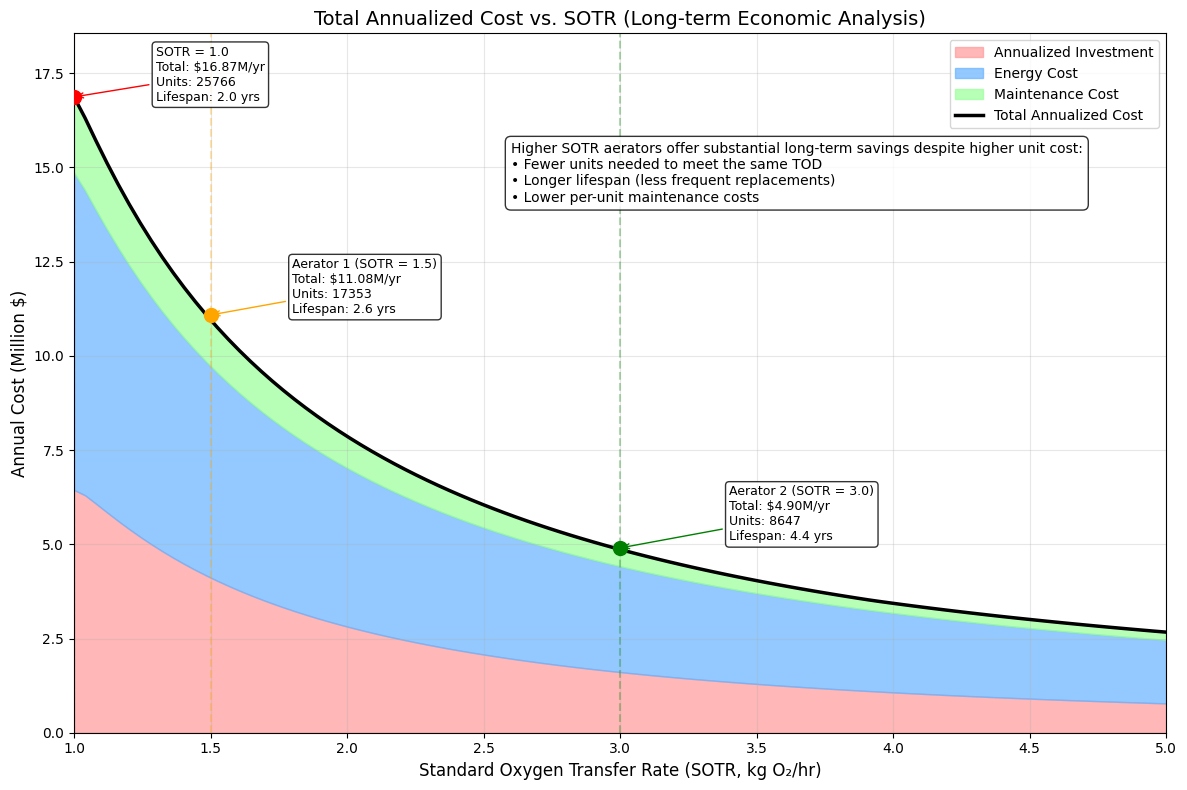

Aerator Type,SOTR(kg O₂/hr),UnitsRequired,UnitCost ($),Lifespan(years),AnnualInvestment ($M),AnnualEnergy ($M),AnnualMaintenance ($M),Total AnnualCost ($M)
SOTR = 1.0,1.0,25766,$500,2.0,$6.44,$8.42,$2.01,$16.87
Aerator 1 (SOTR = 1.5),1.5,17353,$620,2.6,$4.17,$5.67,$1.24,$11.08
Aerator 2 (SOTR = 3.0),3.0,8647,$823,4.4,$1.63,$2.83,$0.45,$4.90


In [6]:
# Create a comprehensive analysis of total annualized costs for aerators with different SOTR values

# Define the relationship between SOTR, durability, and annual maintenance
# (higher SOTR typically means longer lifespan and lower maintenance)
def get_aerator_properties(sotr):
    """Calculate durability and maintenance based on SOTR"""
    base_durability = 2.0  # years
    base_maintenance = 65  # dollars per year

    # Model where durability increases with SOTR (tapered to avoid unrealistic values)
    durability = min(base_durability * (0.4 + 0.6 * sotr), 10.0)

    # Model where maintenance cost decreases with SOTR (but can't go below a minimum)
    maintenance = max(base_maintenance * (1.4 - 0.2 * sotr), 40.0)

    # Model where unit cost increases with SOTR (diminishing returns on price)
    unit_cost = 500 + 200 * (sotr - 1.0) ** 0.7

    return durability, maintenance, unit_cost


# Define a function to calculate total annualized cost
def calculate_annualized_cost(
    sotr, tod=5443.76, temp=30, hours_operation=8, energy_cost=0.05
):
    """Calculate total annualized cost for an aerator with given SOTR"""
    # Get aerator properties
    durability, maintenance_cost, unit_cost = get_aerator_properties(sotr)

    # Calculate temperature-adjusted oxygen transfer rate
    temp_diff = temp - 20
    otrt = sotr * 0.5 * (1.024**temp_diff)

    # Calculate number of aerators needed
    # TOD is in kg O₂/hour (continuous demand)
    # For aerators running only 'hours_operation' hours per day,
    # we need to account for the full 24-hour oxygen demand
    daily_oxygen_demand = tod * 24  # Total kg O₂ needed per day
    daily_oxygen_per_aerator = (
        otrt * hours_operation
    )  # kg O₂ each aerator provides per day
    num_aerators = daily_oxygen_demand / daily_oxygen_per_aerator

    # Calculate costs
    power_kw = 2.238  # 3 HP * 0.746 kW/HP

    # Initial investment (annualized)
    annual_investment = (num_aerators * unit_cost) / durability

    # Annual energy cost
    annual_energy = (
        num_aerators * power_kw * hours_operation * 365 * energy_cost
    )

    # Annual maintenance cost
    annual_maintenance = num_aerators * maintenance_cost

    # Total annualized cost
    total_annual_cost = annual_investment + annual_energy + annual_maintenance

    return {
        "sotr": sotr,
        "otrt": otrt,
        "num_aerators": num_aerators,
        "durability": durability,
        "maintenance_cost": maintenance_cost,
        "unit_cost": unit_cost,
        "annual_investment": annual_investment,
        "annual_energy": annual_energy,
        "annual_maintenance": annual_maintenance,
        "total_annual_cost": total_annual_cost,
    }


# Generate data for a range of SOTR values
sotr_range = np.linspace(1.0, 5.0, 100)
results = [calculate_annualized_cost(sotr) for sotr in sotr_range]

# Extract data for plotting
sotr_values = [r["sotr"] for r in results]
total_costs = [
    r["total_annual_cost"] / 1000000 for r in results
]  # Convert to millions
investment_costs = [r["annual_investment"] / 1000000 for r in results]
energy_costs = [r["annual_energy"] / 1000000 for r in results]
maintenance_costs = [r["annual_maintenance"] / 1000000 for r in results]

# Create a stacked area plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked areas for cost components
ax.fill_between(
    sotr_values,
    0,
    investment_costs,
    alpha=0.7,
    color="#FF9999",
    label="Annualized Investment",
)
ax.fill_between(
    sotr_values,
    investment_costs,
    [i + e for i, e in zip(investment_costs, energy_costs)],
    alpha=0.7,
    color="#66B2FF",
    label="Energy Cost",
)
ax.fill_between(
    sotr_values,
    [i + e for i, e in zip(investment_costs, energy_costs)],
    [
        i + e + m
        for i, e, m in zip(investment_costs, energy_costs, maintenance_costs)
    ],
    alpha=0.7,
    color="#99FF99",
    label="Maintenance Cost",
)

# Plot total cost line
ax.plot(
    sotr_values,
    total_costs,
    "k-",
    linewidth=2.5,
    label="Total Annualized Cost",
)

# Highlight our reference points
for i, sotr in enumerate(reference_SOTR_values):
    # Find the closest value in our results
    idx = min(
        range(len(sotr_values)), key=lambda i: abs(sotr_values[i] - sotr)
    )
    r = results[idx]

    total_cost = r["total_annual_cost"] / 1000000

    # Plot point and add annotation
    ax.scatter(sotr, total_cost, color=reference_colors[i], s=100, zorder=5)
    ax.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.3)

    # Add label with cost breakdown - positioned inside the chart
    # Adjust position based on the point's location in the chart
    if i == 0:  # First point (highest cost)
        x_offset = 0.3
        y_offset = -0.1  # Position below the point
    elif i == 1:  # Middle point
        x_offset = 0.3
        y_offset = 0.05  # Position below the point
    else:  # Last point (lowest cost)
        x_offset = 0.4  # Position to the left
        y_offset = 0.2  # Position above the point

    ax.annotate(
        f"{reference_labels[i]}\nTotal: ${total_cost:.2f}M/yr\nUnits: {r['num_aerators']:.0f}\nLifespan: {r['durability']:.1f} yrs",
        xy=(sotr, total_cost),
        xytext=(sotr + x_offset, total_cost + y_offset),
        arrowprops=dict(arrowstyle="->", color=reference_colors[i]),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        fontsize=9,  # Slightly smaller font to fit better
    )

# Add graph details
ax.set_title(
    "Total Annualized Cost vs. SOTR (Long-term Economic Analysis)", fontsize=14
)
ax.set_xlabel("Standard Oxygen Transfer Rate (SOTR, kg O₂/hr)", fontsize=12)
ax.set_ylabel("Annual Cost (Million $)", fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xlim(1.0, 5.0)

# Calculate the range of y-axis for better visualization
max_cost = max(total_costs) * 1.1
ax.set_ylim(0, max_cost)

# Add legend
ax.legend(loc="upper right", fontsize=10)

# Add explanatory annotation - more compact and better positioned
ax.text(
    0.4,  # X position (left side of chart)
    0.8,  # Y position (middle-lower part)
    "Higher SOTR aerators offer substantial long-term savings despite higher unit cost:\n"
    "• Fewer units needed to meet the same TOD\n"
    "• Longer lifespan (less frequent replacements)\n"
    "• Lower per-unit maintenance costs",
    bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.4"),
    fontsize=10,  # Smaller font size
    transform=ax.transAxes,  # Use axes coordinates (0-1) for scalable positioning
    ha="left",
    va="center",
)

plt.tight_layout()
plt.show()

# Create HTML table with cost breakdown for our reference aerators
html_cost_breakdown = """
<div style="margin: 20px 0;">
<h3>Annual Cost Breakdown by Aerator Type</h3>
<p>TOD = {:.0f} kg O₂/day, Temperature = {}°C, Operation = {} hrs/day</p>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Aerator Type</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">SOTR<br>(kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Units<br>Required</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Unit<br>Cost ($)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Lifespan<br>(years)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Annual<br>Investment ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Annual<br>Energy ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Annual<br>Maintenance ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Total Annual<br>Cost ($M)</th>
        </tr>
    </thead>
    <tbody>
""".format(TOD, temp, hours_operation)

# Add rows for reference aerators
for i, sotr in enumerate(reference_SOTR_values):
    # Find the closest value in our results
    idx = min(
        range(len(sotr_values)), key=lambda i: abs(sotr_values[i] - sotr)
    )
    r = results[idx]

    if r["sotr"] == min(reference_SOTR_values):
        row_color = "#c02239"  # Red for baseline (worst performer)
    elif (
        abs(r["sotr"] - 3.5) < 0.1
    ):  # Explicitly check for SOTR = 3.5 (best performer)
        row_color = "#0fe221"  # Green for best performer
    else:
        row_color = "#c7a020"  # Yellow for middle performer

    html_cost_breakdown += f"""
        <tr style="background-color: {row_color};">
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{reference_labels[i]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{r["sotr"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{r["num_aerators"]:.0f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["unit_cost"]:.0f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{r["durability"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["annual_investment"] / 1000000:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["annual_energy"] / 1000000:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["annual_maintenance"] / 1000000:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;"><strong>${r["total_annual_cost"] / 1000000:.2f}</strong></td>
        </tr>
    """

# Calculate total 10-year cost for comparison
best_annual_cost = next(
    (
        r["total_annual_cost"]
        for r in results
        if abs(r["sotr"] - max(reference_SOTR_values)) < 0.1
    ),
    0,
)
worst_annual_cost = next(
    (
        r["total_annual_cost"]
        for r in results
        if abs(r["sotr"] - min(reference_SOTR_values)) < 0.1
    ),
    0,
)
ten_year_savings = (
    (worst_annual_cost - best_annual_cost) * 10 / 1000000
)  # in millions

# Close the HTML table with analysis
html_cost_breakdown += f"""
    </tbody>
</table>

<div style="margin-top: 10px; padding: 10px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>10-Year Cost Analysis:</strong></p>
    <ul>
        <li>High-efficiency aerator (SOTR = 3.5) saves approximately <strong>${ten_year_savings:.2f}M over 10 years</strong> compared to baseline</li>
        <li>Despite higher unit cost, the total number of units required is significantly lower</li>
        <li>Longer lifespan means less frequent capital expenditure for replacements</li>
        <li>The economic advantage increases with farm scale and operational lifetime</li>
    </ul>
</div>
</div>
"""

# Display the HTML table
display(HTML(html_cost_breakdown))

### 2.3.6 Net Present Value (NPV) of Savings

$$
\text{NPV}_{\text{Savings}} = \sum_{i=1}^{n} \frac{\text{Annual Saving}_{\text{Year 1}} \times (1 + r_{\text{inflation}})^{i-1}}{(1 + r_{real})^i}
$$

Where $r*{\text{real}} = \frac{1 + r*{\text{nominal}}}{1 + r_{inflation}} - 1$ (Intelligon, 2022; Susilowati et al., 2021).

Real Discount Rate: 0.0732 (7.32%) annual
Monthly Real Discount Rate: 0.005902 (0.5902%)


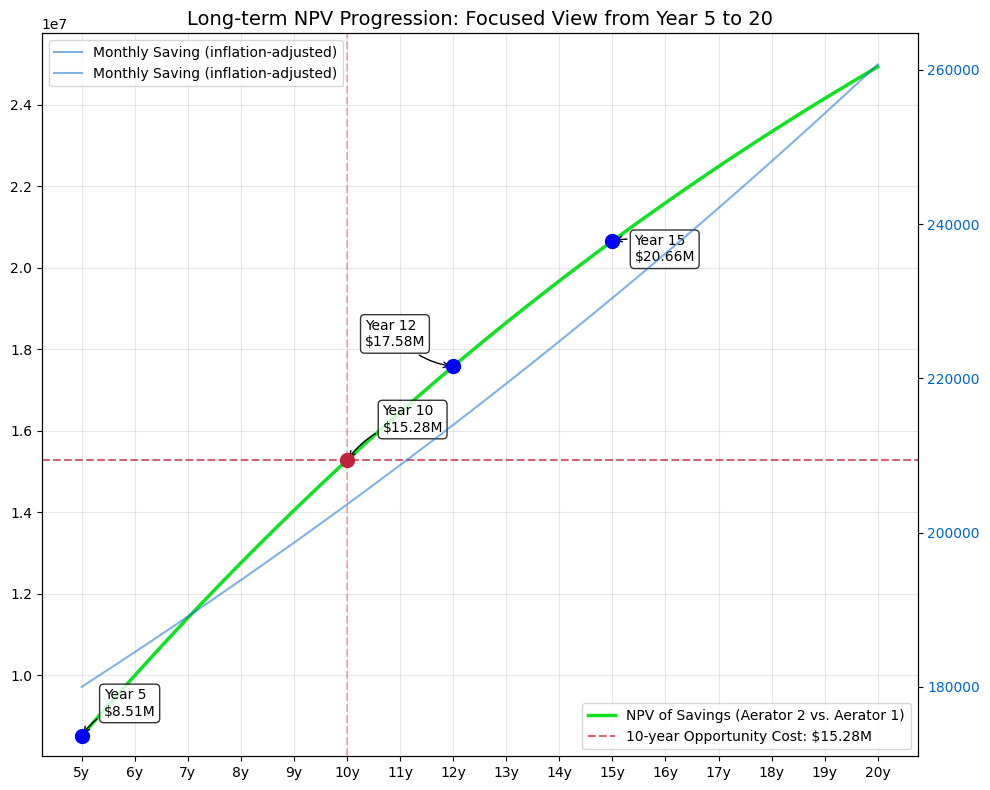

Timeframe,NPV of Savings,Monthly Saving(with inflation),Cumulative NominalSavings,Growth fromPrevious Period
Year 5 (60 months),"$8,513,415","$180,016","$10,171,288",N/A
Year 10 (120 months),"$15,280,147","$203,672","$21,679,168",79.48% (15.90%/year)
Year 12 (144 months),"$17,580,691","$213,983","$26,695,163",15.06% (7.53%/year)
Year 15 (180 months),"$20,658,561","$230,436","$34,699,277",17.51% (5.84%/year)


In [7]:
# Create a visualization of the relative NPV of savings for the aerators (Monthly View)

# Constants from the case study (cell 21)
inflation_rate = 0.025  # 2.5% annual inflation rate
nominal_discount_rate = 0.10  # 10% annual discount rate

# Convert annual rates to monthly rates
monthly_inflation_rate = (1 + inflation_rate) ** (1 / 12) - 1
monthly_discount_rate = (1 + nominal_discount_rate) ** (1 / 12) - 1

# Calculate real discount rate using the provided formula (monthly basis)
monthly_real_discount_rate = (1 + monthly_discount_rate) / (
    1 + monthly_inflation_rate
) - 1

# Calculate annual real discount rate
real_discount_rate = (1 + nominal_discount_rate) / (1 + inflation_rate) - 1

print(
    f"Real Discount Rate: {real_discount_rate:.4f} ({real_discount_rate * 100:.2f}%) annual"
)
print(
    f"Monthly Real Discount Rate: {monthly_real_discount_rate:.6f} ({monthly_real_discount_rate * 100:.4f}%)"
)

# Define aerator properties (from cell 16 and cell 21)
aerator_data = {
    "Aerator 1": {
        "sotr": 1.9,
        "cost_per_unit": 700,
        "durability": 2.0,
        "annual_maintenance": 65,
        "units_required": 4356,
        "annual_energy_cost": 1423314,
        "annual_maintenance_cost": 283140,
        "annual_replacement_cost": 1524600,
        "total_annual_cost": 3231054,
        "annual_saving": 0,  # baseline
        "monthly_saving": 0,  # baseline
        "total_investment": 4356 * 700,  # units × cost per unit
        "color": "#c02239",  # red
    },
    "Aerator 2": {
        "sotr": 3.5,
        "cost_per_unit": 900,
        "durability": 5.0,
        "annual_maintenance": 50,
        "units_required": 2367,
        "annual_energy_cost": 773413,
        "annual_maintenance_cost": 118350,
        "annual_replacement_cost": 426060,
        "total_annual_cost": 1317823,
        "annual_saving": 1913231,  # relative to Aerator 1
        "monthly_saving": 1913231 / 12,  # monthly savings
        "total_investment": 2367 * 900,  # units × cost per unit
        "color": "#0fe221",  # green
    },
}


# Define a function to calculate NPV of savings based on monthly cash flows
def calculate_monthly_npv_of_savings(
    monthly_saving_month1,
    months,
    monthly_inflation_rate,
    monthly_real_discount_rate,
):
    """
    Calculate NPV of savings using the formula (monthly version):
    NPV_Savings = ∑ (Monthly Saving_Month 1 × (1 + r_inflation_monthly)^(i-1)) / (1 + r_real_monthly)^i
    from i=1 to n
    """
    npv = 0
    for i in range(1, months + 1):
        # Calculate inflation-adjusted savings for month i
        saving_month_i = monthly_saving_month1 * (
            1 + monthly_inflation_rate
        ) ** (i - 1)
        # Calculate discounted saving for month i
        discounted_saving = (
            saving_month_i / (1 + monthly_real_discount_rate) ** i
        )
        # Add to NPV
        npv += discounted_saving
    return npv


# Define months for analysis (up to 20 years = 240 months)
max_months = 240
min_months = 60  # Start from 5 years (60 months) for focused view
months_array = np.arange(min_months, max_months + 1)

# Calculate monthly savings for each month (with inflation)
monthly_saving = aerator_data["Aerator 2"]["monthly_saving"]
monthly_savings = [
    monthly_saving * (1 + monthly_inflation_rate) ** (i - 1)
    for i in range(1, max_months + 1)
]

# Calculate cumulative NPV for each month
monthly_npv = [
    calculate_monthly_npv_of_savings(
        monthly_saving, m, monthly_inflation_rate, monthly_real_discount_rate
    )
    for m in range(1, max_months + 1)
]

# Find NPV at 5 years (60 months) for y-axis starting point
npv_at_5_years = monthly_npv[59]  # 0-indexed, so 59 is the 60th month

# Create milestone table for specific years
milestones = [60, 120, 144, 180]
# Create a DataFrame to hold milestone data
milestones_data = []

for month in milestones:
    idx = month - 1  # Convert to 0-based index
    year = month // 12
    npv_value = monthly_npv[idx]
    current_monthly_saving = monthly_savings[idx]
    cumulative_nominal = sum(monthly_savings[:month])

    milestones_data.append(
        {
            "Year": year,
            "Month": month,
            "NPV of Savings": f"${npv_value:,.0f}",
            "Monthly Saving": f"${current_monthly_saving:,.0f}",
            "Cumulative Nominal Savings": f"${cumulative_nominal:,.0f}",
        }
    )

milestones_table = pd.DataFrame(milestones_data)

# Set up the figure for NPV comparison - focused view from 5 years onward
plt.figure(figsize=(10, 8))

# Create a smooth curve of NPV over months - only showing from 5 years (60 months) onward
plt.plot(
    months_array,
    monthly_npv[min_months - 1 :],
    color="#0fe221",
    linewidth=2.5,
    label="NPV of Savings (Aerator 2 vs. Aerator 1)",
)

# Add milestone markers
for month in milestones:
    if month >= min_months:  # Only show milestones from 5 years onward
        idx = month - 1
        npv_at_milestone = monthly_npv[idx]
        year = month // 12

        # Add marker
        plt.scatter(
            month,
            npv_at_milestone,
            color="#c02239"
            if month == 120
            else "blue",  # Highlight 10-year mark in red
            s=100,
            zorder=5,
        )

        # Add value label with manual positioning
        # Define custom offsets for each milestone (x_offset, y_offset)
        annotation_offsets = {
            60: (5, 500000),  # Year 5 position
            120: (8, 700000),  # Year 10 position
            144: (-20, 500000),  # Year 12 position
            180: (5, -500000),  # Year 15 position
        }

        # Get the offset for this milestone or use default if not specified
        x_offset, y_offset = annotation_offsets.get(month, (5, 0))

        plt.annotate(
            f"Year {year}\n${npv_at_milestone / 1000000:.2f}M",
            xy=(month, npv_at_milestone),
            xytext=(month + x_offset, npv_at_milestone + y_offset),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        )

# Mark the opportunity cost at 10 years (120 months)
opportunity_cost = monthly_npv[119]  # At 120 months (10 years)
opportunity_cost_month = 120
plt.axhline(
    y=opportunity_cost,
    linestyle="--",
    color="#c02239",
    alpha=0.7,
    label=f"10-year Opportunity Cost: ${opportunity_cost / 1000000:.2f}M",
)

# Add vertical line at 10 years to highlight reference point
plt.axvline(
    x=opportunity_cost_month,
    linestyle="--",
    color="#c02239",
    alpha=0.3,
)

# Add explanatory annotation for opportunity cost
# plt.annotate(
#    f"Opportunity Cost\n${opportunity_cost / 1000000:.2f}M over 10 years",
#    xy=(opportunity_cost_month, opportunity_cost),
#    xytext=(opportunity_cost_month + 20, opportunity_cost + 1500000),
#    arrowprops=dict(
#        arrowstyle="->", connectionstyle="arc3,rad=.2", color="#c02239"
#    ),
#    fontsize=11,
#    color="#c02239",
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
# )

# Add parameter information at the top right
# param_table = (
#    "Parameters:\n"
#    f"• Annual Inflation Rate: {inflation_rate * 100:.1f}%\n"
#    f"• Annual Discount Rate: {nominal_discount_rate * 100:.1f}%\n"
#    f"• Annual Saving: ${aerator_data['Aerator 2']['annual_saving']:,.0f}\n"
#    f"• NPV at 5 years: ${npv_at_5_years:,.0f}\n"
#    f"• NPV at 10 years: ${opportunity_cost:,.0f}\n"
# )

# plt.text(
#    0.98,
#    0.98,
#    param_table,
#    transform=plt.gca().transAxes,
#    fontsize=9,
#    verticalalignment="top",
#    horizontalalignment="right",
#    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
# )

# Configure plot
plt.xlabel("")
plt.ylabel("")
plt.title(
    "Long-term NPV Progression: Focused View from Year 5 to 20",
    fontsize=14,
)

# Show every 12 months (1 year) on x-axis
yearly_ticks = np.arange(60, max_months + 1, 12)
yearly_labels = [f"{m // 12}y" for m in yearly_ticks]
plt.xticks(yearly_ticks, yearly_labels)

# Set y-axis to start near the 5-year NPV value (subtract a small buffer)
buffer = 500000  # $500K buffer below the 5-year value
plt.ylim(
    npv_at_5_years - buffer, None
)  # None for the upper limit lets matplotlib decide

plt.grid(True, alpha=0.3)
plt.legend(loc="lower right")

# Create a second y-axis for the monthly savings
ax2 = plt.twinx()
ax2.set_ylabel("")

# Plot monthly savings over time (with inflation) - only from 5 years onward
ax2.plot(
    months_array,
    monthly_savings[min_months - 1 :],
    color="#0066cc",
    linestyle="-",
    alpha=0.5,
    label="Monthly Saving (inflation-adjusted)",
)

# Customize y-axis for better readability
ax2.tick_params(axis="y", labelcolor="#0066cc")

# Set the y-axis of monthly savings to start from the value at 5 years
monthly_saving_at_5_years = monthly_savings[59]
buffer_percent = 0.05  # 5% buffer
ax2.set_ylim(monthly_saving_at_5_years * (1 - buffer_percent), None)

# Add legend for both axes
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

# Calculate average annual NPV growth rate between years 5-10 and 10-20
npv_5yr = monthly_npv[59]  # 5 years
npv_10yr = monthly_npv[119]  # 10 years
npv_20yr = monthly_npv[239]  # 20 years

growth_rate_5_10 = (
    (npv_10yr - npv_5yr) / npv_5yr * 100 / 5
)  # Average annual % growth
growth_rate_10_20 = (
    (npv_20yr - npv_10yr) / npv_10yr * 100 / 10
)  # Average annual % growth

# Display milestone table with growth rates
# print("NPV and Savings Milestones")
# display(milestones_table)

# Generate HTML table with detailed values and growth insights
html_npv_table = f"""
<div style="margin: 20px 0;">
<h3>Net Present Value Analysis: Long-term Progression (Years 5-20)</h3>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: transparent;">
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Timeframe</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">NPV of Savings</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Monthly Saving<br>(with inflation)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Cumulative Nominal<br>Savings</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Growth from<br>Previous Period</th>
        </tr>
    </thead>
    <tbody>
"""  # noqa: F541

# Add rows for key milestones
prev_npv = None
for i, item in enumerate(milestones_data):
    highlight = ""
    if item["Month"] == 120:  # Highlight 10-year mark
        highlight = "background-color: transparent;"

    # Extract NPV value for calculation (remove $ and commas, then convert to float)
    npv_str = item["NPV of Savings"]
    npv_value = float(npv_str.replace("$", "").replace(",", ""))

    # Calculate growth from previous period (if available)
    growth_text = "N/A"
    if i > 0 and prev_npv is not None:
        months_diff = item["Month"] - milestones_data[i - 1]["Month"]
        years_diff = months_diff / 12
        growth_percent = (npv_value - prev_npv) / prev_npv * 100
        annual_growth = growth_percent / years_diff
        growth_text = f"{growth_percent:.2f}% ({annual_growth:.2f}%/year)"

    html_npv_table += f"""
        <tr style="padding: 8px; {highlight}">
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">Year {item["Year"]} ({item["Month"]} months)</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{item["NPV of Savings"]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{item["Monthly Saving"]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{item["Cumulative Nominal Savings"]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{growth_text}</td>
        </tr>
    """
    prev_npv = npv_value

# Add note on the opportunity cost and growth analysis
html_npv_table += """
    </tbody>
</table>

<div style="margin-top: 10px; padding: 10px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>Long-term NPV Growth Analysis:</strong></p>
    <ul>
        <li>Between years 5-10, NPV grows by an average of {growth_rate_5_10:.2f}% per year.</li>
        <li>Between years 10-20, NPV grows by an average of {growth_rate_10_20:.2f}% per year.</li>
        <li>The highest rate of NPV accumulation occurs in earlier years.</li>
        <li>The 10-year opportunity cost (${opportunity_cost:,.0f}) represents the economic value lost by choosing the less efficient aerator.</li>
    </ul>
</div>
</div>
"""

# Display the HTML table
display(HTML(html_npv_table))

<!-- jupyter: {tags: ["subsection", "mathematical-models"]} -->

### 2.3.7 Adapted Financial Metrics

Standard metrics (IRR, Payback, ROI, k) were adapted due to violations of positive incremental investment assumptions in aquaculture equipment comparison (Engle, 2010; Kumar et al., 2020).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

#### 2.3.7.1 Internal Rate of Return (IRR)

$$
0 = - \Delta I + \sum_{i=1}^{n} \frac{S_{yr1} \times (1 + r_{\text{inflation}})^{i-1}}{(1 + \text{IRR})^i}
$$

If $\Delta I \leq 0$, standard IRR is undefined; adapted IRR anchors against baseline cost, scaled by SOTR ratio, capped at 100% (Kumar et al., 2020).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

#### 2.3.7.2 Payback Period

$$
\text{Payback Period} =
\begin{cases}
\frac{0.01}{R_{SOTR}} & \text{if } \Delta I < 0 \text{ and } S_{yr1} > 0 \\
\frac{\Delta I}{S_{yr1}} & \text{if } \Delta I \geq 0 \text{ and } S_{yr1} > 0 \\
\infty & \text{if } S_{yr1} \leq 0
\end{cases}
$$

If $\Delta I \leq 0$, a small value divided by SOTR ratio indicates immediate benefit (Susilowati et al., 2021).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

#### 2.3.7.3 Return on Investment (ROI)

$$
\text{ROI}_{\text{relative}} =
\begin{cases}
\min\left( \left( \frac{S_{yr1}}{C_{base}} \times R_{SOTR} \times (1 + F_{cost\_sav}) \right) \times 100, R_{SOTR} \times 100 \right) & \text{if } \Delta I < 0 \text{ and } S_{yr1} > 0 \\
\min\left( \left( \frac{S_{yr1}}{C_{base}} \times R_{SOTR} \right) \times 100, R_{SOTR} \times 100 \right) & \text{if } \Delta I = 0 \text{ and } S_{yr1} > 0 \\
\min\left( \left( \frac{S_{yr1}}{\Delta I} \right) \times 100, R_{SOTR} \times 100 \right) & \text{if } \Delta I > 0 \text{ and } S_{yr1} > 0 \\
0 & \text{if } S_{yr1} \leq 0 \text{ or } C_{base} \leq 0
\end{cases}
$$

Where $F_{cost\_sav} = \frac{|\Delta I|}{C_{base}}$. If $\Delta I \leq 0$, relative ROI is based on savings relative to baseline cost, scaled by SOTR ratio (Intelligon, 2022).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->
#### 2.3.7.4 Profitability Index (k)

$$
k_{\text{relative}} =
\begin{cases}
k_{base} \times (1 + F_{cost\_sav}) & \text{if } \Delta I < 0 \\
k_{base} & \text{if } \Delta I = 0 \\
k_{base} \times F_{cost} & \text{if } \Delta I > 0 \\
0 & \text{if } NPV_{sav} \leq 0 \text{ or } C_{base} \leq 0
\end{cases}
$$

Where $k_{base} = \frac{NPV_{sav}}{C_{base}} \times R_{SOTR}$, $F_{cost\_sav} = \frac{|\Delta I|}{C_{base}}$, $F_{cost} = \frac{C_{base}}{C_{base} + \Delta I}$ (Engle, 2010).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->
#### 2.3.7.5 Opportunity Cost

$$
\text{Opportunity Cost}_{\text{baseline}} = \text{NPV}_{\text{Savings (winner vs. baseline)}}
$$

Quantifies economic loss from less efficient equipment (Boyd & Hanson, 2021; Susilowati et al., 2021).


<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->
#### 2.3.7.6 Equilibrium Price

$$
P_{eq} =
\begin{cases}
\max\left(0, P_{base} \times R_{SOTR} \times \left(\frac{1}{1 + F_{cost, eq}}\right)\right) & \text{if } C_{base} > 0 \text{ and } P_{base} > 0 \\
\max\left(0, P_{base} \times R_{SOTR}\right) & \text{if } C_{base} \leq 0 \text{ or } P_{base} \leq 0 \\
0 & \text{if calculation prerequisites fail}
\end{cases}
$$

Where $P_{base} = \frac{(C_{\text{annual, non-winner}} - (C_{E, \text{winner}} + C_{M, \text{winner}})) \times D_{\text{winner}}}{N_{\text{winner}}}$, $F_{cost, eq} = P_{base} / C_{base}$ (Asche et al., 2021).


<div class="section">
<h2>3 Results</h2>
</div>

### 3.1 Case Study: Comparative Analysis of Aerators

#### 3.1.1 Farm Operating Conditions

- **Total Oxygen Demand (TOD):** 5,443.76 kg O₂/day
- **Farm Area:** 1,000 hectares
- **Shrimp Price:** $5.00/kg
- **Culture Period:** 120 days
- **Shrimp Density:** 0.33 kg/m³
- **Pond Depth:** 1.0 m
- **Water Temperature (T):** 31.5°C
- **Calculated Annual Revenue:** $50,694,439.38
- **Analysis Horizon (n):** 10 years
- **Annual Inflation Rate $(r_{\text{inflation}})$:** 2.5%
- **Annual Discount Rate $(r_{\text{nominal}})$:** 10%


### 3.1.2 Aerator Specifications and Calculated Metrics

**Table 1.** Aerator specifications and financial metrics.

| Parameter                          | Aerator 1      | Aerator 2 (Winner) | Unit / Notes                 |
| ---------------------------------- | -------------- | ------------------ | ---------------------------- |
| **Technical Specs**                |                |                    |                              |
| SOTR                               | 1.9            | 3.5                | kg O₂/hr                     |
| Power                                                           | 3              | 3                  | HP                           |
| Power (kW)                         | 2.238          | 2.238              | kW                           |
| OTR_T (31.5°C)                     | 1.26           | 2.33               | kg O₂/hr                     |
| SAE                                | 0.85           | 1.56               | kg O₂/kWh                    |
| **Unit Costs & Durability**        |                |                    |                              |
| Cost per Unit                      | $700           | $900               | USD                          |
| Durability                         | 2.0            | 5.0                | years                        |
| Annual Maintenance per Unit        | $65            | $50                | USD                          |
| **Implementation**                 |                |                    |                              |
| Number Required                    | 4,356          | 2,367              | Units                        |
| Total Power Installed              | 13,068         | 7,101              | HP                           |
| Aerators per Hectare               | 4.36           | 2.37               | Units/ha                     |
| HP per Hectare                     | 13.07          | 7.10               | HP/ha                        |
| **Financial Analysis**             |                |                    |                              |
| Total Initial Investment (ΔI)      | $3,049,200     | $2,130,300         | USD (-$918,900 for A2 vs A1) |
| Annual Energy Cost                 | $1,423,314     | $773,413           | USD                          |
| Annual Maintenance Cost            | $283,140       | $118,350           | USD                          |
| Annual Replacement Cost            | $1,524,600     | $426,060           | USD                          |
| **Total Annual Cost**              | **$3,231,054** | **$1,317,823**     | **USD**                      |
| Annual Saving (A2 vs A1)           | --             | $1,913,231         | USD                          |
| Cost as % of Revenue               | 6.37%          | 2.60%              | %                            |
| NPV of Savings (A2 vs A1, 10 yrs)  | $0             | $14,625,751        | USD                          |
| Payback Period (A2 vs A1)          | N/A            | 0.01               | years (Relative Payback)     |
| ROI (A2 vs A1)                     | 0%             | 150.42%            | % (Relative ROI)             |
| IRR (A2 vs A1, 10 yrs)             | -100%          | 343.93%            | % (Adapted IRR)              |
| Profitability Index (k) (A2 vs A1) | 0              | 11.5               | (Relative k)                 |
| Opportunity Cost (Choosing A1)     | $14,625,751    | $0                 | USD                          |
| Equilibrium Price (for A1)         | $9,082         | N/A                | USD                          |

_Note:_ Table 1 summarizes the technical and financial comparison of Aerator 1 and Aerator 2, highlighting efficiency and cost differences.


<div class="references">
<h2>4. References</h2>
</div>

- Asche, F., Roll, K. H., Tveteras, R., 2021. Market aspects and external economic effects of aquaculture. Aquac. Econ. Manag. 25, 1–7. https://doi.org/10.1080/13657305.2020.1869861
- Boyd, C. E., 2015. Efficiency of mechanical aeration. Responsible Seafood Advocate. https://www.globalseafood.org/advocate/efficiency-of-mechanical-aeration/ (accessed 14 May 2025).
- Boyd, C. E., 2020. Energy use in aquaculture pond aeration, Part 1. Responsible Seafood Advocate. https://www.globalseafood.org/advocate/energy-use-in-aquaculture-pond-aeration-part-1/ (accessed 14 May 2025).
- Boyd, C. E., Hanson, T. R., 2021. Aerator energy use in shrimp farming and means for improvement. J. World Aquac. Soc. 52, 566–578. https://doi.org/10.1111/jwas.12753
- Engle, C. R., 2010. Aquaculture economics and financing: Management and analysis. Wiley-Blackwell, Ames, IA. https://onlinelibrary.wiley.com/doi/book/10.1002/9780813814346
- Engle, C. R., 2017. Aquaculture businesses: A practical guide to economics and marketing. 5m Publishing, Sheffield, UK.
- Food and Agriculture Organization of the United Nations, n.d. Chapter 24 economic aspects of aquafarm construction and maintenance, in: Simple methods for aquaculture - Manual. FAO, Rome.
- Intelligon, 2022. Shrimp farming basics: Project viability and investment analysis. Intelligon Blogs. https://blogs.intelligon.com/2022/02/28/shrimp-farming-basics-project-viability-and-investing-assessment/ (accessed 14 May 2025).
- Jolly, C. M., Clonts, H. A., 1993. Economics of aquaculture. Food Products Press, New York.
- Kumar, G., Engle, C., Tucker, C. S., 2020. Assessment of standard aeration efficiency of different aerators and its relation to the overall economics in shrimp culture. Aquac. Eng. 90, 102088. https://doi.org/10.1016/j.aquaeng.2020.102088
- Merino, G., Barange, M., Blanchard, J. L., Harle, J., Holmes, R., Allen, I., Allison, E. H., Badjeck, M.-C., Dulvy, N. K., Holt, J., Jennings, S., Mullon, C., Rodwell, L. D., 2024. Environmental, economic, and social sustainability in aquaculture: The aquaculture performance indicators. Nat. Commun. 15, 4955. https://doi.org/10.1038/s41467-024-49556-8
- Nunes, A. J. P., Musig, Y., 2013. Survey of aeration management in shrimp farming. SlideShare. https://www.slideshare.net/AquacultureASIA/survey-of-aeration-management-in-shrimp-farming (accessed 14 May 2025).
- Responsible Seafood Advocate, 2022. A comparison of resource use in shrimp farming, part 3: Energy. Responsible Seafood Advocate. https://www.globalseafood.org/advocate/a-comparison-of-resource-use-in-shrimp-farming-part-3-energy/ (accessed 14 May 2025).
- Roy, S. M., Sadek, S., Shafiq, M. A., Nasr, M., Mohsen, M., 2024. Advances in aeration and wastewater treatment in shrimp farming: Emerging trends, current challenges, and future perspectives. AQUA Water Infrastruct. Ecosyst. Soc. 73, 902–917. https://doi.org/10.2166/aqua.2024.256
- Sadek, S., Nasr, M., Hassan, A., 2020. Assessment of the new generation aeration systems efficiency and water current flow rate, its relation to the cost economics at varying salinities. Aquac. Res. 51, 2257–2268. https://doi.org/10.1111/are.14562
- Susilowati, Y. D., Perdana, M. C., Suparmanto, I., 2021. Sustainability and feasibility assessments of nanobubble aeration technology in economic-socio environment of Penaeus vannamei shrimp farming. BIO Web Conf. 33, 05005. https://doi.org/10.1051/bioconf/20213305005
- The Fish Site, 2021. A simple means to improve shrimp farming efficiency. The Fish Site. https://thefishsite.com/articles/a-simple-means-to-improve-shrimp-farming-efficiency (accessed 14 May 2025).
- Tveteras, R., 2009. Economic inefficiency and environmental impact: An application to aquaculture production. J. Environ. Econ. Manag. 58, 93–104. https://doi.org/10.1016/j.jeem.2008.10.005
- Valderrama, D., Hishamunda, N., Cai, J., 2023. Economic analysis of the contributions of aquaculture to future food security. Aquaculture 577, 740023. https://doi.org/10.1016/j.aquaculture.2023.740023
- Walras, L., 1874. Éléments d'économie politique pure, ou théorie de la richesse sociale. L. Corbaz, Lausanne.
